In [1]:
import property_inference_interface
interface = property_inference_interface.PropertyInferenceInterface()

meta_params = {
    'first_class': 5, 
    'second_class': 7, 
    'size_of_train_set': 3000, 
    'size_of_test_set': 100, 
    'is_ran_per_included': True, 
    'ran_dist': 'normal', 
    'uni_range': 0.2, 
    'normal_std': 0.1,
    'model_type': 'naive'
}

interface.set_meta_params(meta_params)
interface.print_meta_params()

Using TensorFlow backend.


first_class          : 5
second_class         : 7
size_of_train_set    : 3000
size_of_test_set     : 100
is_ran_per_included  : True
ran_dist             : normal
uni_range            : 0.2
normal_std           : 0.1
model_type           : naive


In [2]:
interface.prepare_dataset()
interface.print_dataset_shape()

Train dataset
(3000, 784) (3000,)
Test dataset
(100, 784) (100,)


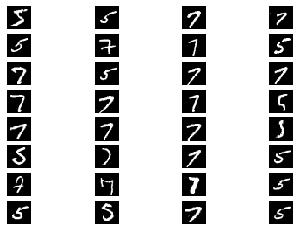

In [3]:
# Visualize the dataset
%matplotlib inline
interface.print_some_samples()

In [4]:
interface.generate_model()
interface.eval_model()

Model (train) accurancy: 1.0


In [5]:
interface.generate_set_of_preconditions()
interface.print_set_of_preconditions()
num_first_F, num_second_F, num_unqi_fist_F, num_unqi_secon_F = interface.info_about_set_of_preconditions()

Total Input Properties extracted for the first class: 8201
Total Input Properties extracted for the second class: 9799
Total Input Properties extracted for the first class (unique): 709
Total Input Properties extracted for the second class (unique): 3932


In [6]:
benign_detect_ratio, adversarial_detect_ratio = interface.evaluate_algorithm_on_test_set()

Evaluate on benign samples with test set
82 100 0.82
Evaluate on adversarial samples with test set
94 100 0.94


In [7]:
exp_info = [num_first_F, num_second_F, num_unqi_fist_F, num_unqi_secon_F, benign_detect_ratio, adversarial_detect_ratio]
print(exp_info)

[8201, 9799, 709, 3932, 0.82, 0.94]


In [8]:
def single_exp():
    interface.generate_model()
    interface.generate_set_of_preconditions()
    num_first_F, num_second_F, num_unqi_fist_F, num_unqi_secon_F = interface.info_about_set_of_preconditions()
    benign_detect_ratio, adversarial_detect_ratio = interface.evaluate_algorithm_on_test_set(verbose=False)
    exp_info = [num_first_F, num_second_F, num_unqi_fist_F, num_unqi_secon_F, benign_detect_ratio, adversarial_detect_ratio]
    return exp_info    

def exp(num_of_trails):
    cumulative_exp_info = []
    for i in range(num_of_trails):
        print('trail', (i+1))
        single_exp_info = single_exp()
        cumulative_exp_info.append(single_exp_info)
        
    return cumulative_exp_info

cumulative_exp_info = exp(100)


trail 1
trail 2
trail 3
trail 4
trail 5
trail 6
trail 7
trail 8
trail 9
trail 10
trail 11
trail 12
trail 13
trail 14
trail 15
trail 16
trail 17
trail 18
trail 19
trail 20
trail 21
trail 22
trail 23
trail 24
trail 25
trail 26
trail 27
trail 28
trail 29
trail 30
trail 31
trail 32
trail 33
trail 34
trail 35
trail 36
trail 37
trail 38
trail 39
trail 40
trail 41
trail 42
trail 43
trail 44
trail 45
trail 46
trail 47
trail 48
trail 49
trail 50
trail 51
trail 52
trail 53
trail 54
trail 55
trail 56
trail 57
trail 58
trail 59
trail 60
trail 61
trail 62
trail 63
trail 64
trail 65
trail 66
trail 67
trail 68
trail 69
trail 70
trail 71
trail 72
trail 73
trail 74
trail 75
trail 76
trail 77
trail 78
trail 79
trail 80
trail 81
trail 82
trail 83
trail 84
trail 85
trail 86
trail 87
trail 88
trail 89
trail 90
trail 91
trail 92
trail 93
trail 94
trail 95
trail 96
trail 97
trail 98
trail 99
trail 100


In [9]:
# for i in range(len(cumulative_exp_info)):
#     print(cumulative_exp_info[i])
import numpy as np
info = np.array(cumulative_exp_info)
print(info.shape)
mean = np.mean(info, axis=0)
std = np.std(info, axis=0)
mean = np.array([round(x, 3) for x in mean])
std = np.array([round(x, 3) for x in std])

for i in range(6):
    print(mean[i], std[i])

(100, 6)
8185.28 3.0
9814.72 3.0
1548.33 359.29
3975.6 833.274
0.747 0.055
0.892 0.083
